#**i. Espectrómetro de masas**#

Iones procedentes de una fuente que suponemos inicialmente en reposo son acelerados en la región *I* mediante un campo eléctrico *E* y posteriormente entran en una región *II* con un campo magnético *B* perpendicular que los desvia. Se elige una muestra de iones dando la masa y carga de cada uno y se obtienen mediante simulación numérica las posiciones en las que inciden.

![Espectrómetro de masas](https://drive.google.com/uc?id=1qfGSZFYbacUOnhm8QdIu6btPWhRy1wLj)

## Ecuaciones de movimiento de una partícula cargada en un campo eléctrico $E$ y en un campo magnético $B$.#



***Zona I: Selector de iones*** 

***Zona II: Analizador magnético***


In [ ]:
######################### Cargamos las librerias ##############################
import numpy as np
#%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#import matplotlib.mlab as mlab
from scipy.integrate import odeint
#import matplotlib.animation as animation
from scipy.signal import find_peaks
import warnings
import random
warnings.filterwarnings("ignore")
##############################
######### Version 2022 #######
###############################################
DNI=12345678 # introduce tu DNI sin letra
##############################################

random.seed(DNI)
# Campo magnético (T) entre 1×10−2 y 2×10−2 T
B=random.randrange(10,20,1)/1000 # T
# Diferencia de potencial entre las placas (V) entre 10 a 30 V
dV=random.randrange(10,30,1) # V

print('Campo magnético: B= {:.2E} T'.format(B))
print('Voltaje entre las placas: dV= {:.2E} V'.format(dV))

Campo magnético: B= 1.10E-02 T
Voltaje entre las placas: dV= 2.80E+01 V


In [ ]:
############## Partículas a estudiar    ###############################
# Definimos un diccionario de particulas con su valor de masa y carga
# particula = {nombre : [masa (Kg), carga(C)]}
iones={'1p+': [1.67E-27, 1.6E-19],'1e-': [9.11E-31, -1.6E-19],'1e+': [9.11E-31, 1.6E-19],
       '1H+': [1.66E-27, 1.6E-19], '2H+': [3.32E-27, 1.6E-19],'3H+': [4.98E-27, 1.6E-19],'4H+': [6.688E-22, 1.6E-19],
       '3He+': [5.0052E-27, 1.6E-19],'4He+': [6.6465E-27, 1.6E-19],'4He++': [6.6465E-27, 3.2E-19],
       '12C+': [19.93E-27, 1.6E-19], '13C+': [21.59E-27, 1.6E-19], '14C+': [23.25E-27, 1.6E-19],
       '16O+': [26.56E-27, 1.6E-19], '17O+': [28.23E-27, 1.6E-19], '18O+': [29.89E-27, 1.6E-19],
       '32S+': [53.10E-27, 1.6E-19], '33S+': [54.75E-27, 1.6E-19], '34S+': [56.41E-27, 1.6E-19],
       '35Cl+': [58.58E-27, 1.6E-19], '36Cl+': [59.76E-27, 1.6E-19], '37Cl+': [61.38E-27, 1.6E-19],
       '39Ca+': [65.27E-27, 1.6E-19],'40Ca+': [66.95E-27, 1.6E-19], '42Ca+': [70.3E-27, 1.6E-19], '43Ca+': [71.97E-27, 1.6E-19]}
ni = len(iones)

### **Cálculo analítico** ####

In [ ]:
######################## Cálculo analítico #########################

ion='3H+'
m=iones[ion][0] # Masa del ion (Kg) 
q=iones[ion][1] # Carga del ion (C)

# Campo magnético (T) entre 1×10−2 y 2×10−2 T
h=0.1 # Distancia entre las placas (m)

E=dV/h  #Campo eléctrico (V/m)
print('Modulo del campo eléctico {:.2E} (V/m)'.format(E))

########### Zona I. #################
# MRUA: FE=q*E=m*a
ac = q*dV/h/m # Aceleración (m/s^2)
print('Aceleración  {:.3E} m/s²'.format(ac))

# Tiempo en recorrer las placas del condensador
# y = y0 + v0*t + 0.5*a*t^2; t=sqrt(-2*y0/a)
# a=q*E/m
tI = h*np.sqrt(2*m/dV/q)
print('Tiempo en recorrer las dos placas del condensador tI= {:.3E} s'.format(tI))

# Velocidad a la salida del condensador
# Ec= eV + E0 = 1/2 m*v^2 por tanto
# v= sqrt(2*dV*q/m)
v=np.sqrt(2*q*dV/m)
print('Velocidad del ion a la salida de las placas del condensador: {:.3E} m/s'.format(v))

########### Zona II. ################
# FB=FC; qvB=mv^2/R
# Ec=1/2 m*v**2
# R=m*v/q/B
R = np.sqrt(2*dV*m/(q*B**2)) 

print('Radio de giro del ión: {:.8E} m'.format(R))
# D=2R=np.sqrt(8mdV/q/B^2)
print('Diámetro de impacto en la pantalla: {:.8E} m'.format(2*R))
# Esta ecuación muestra que cada especie iónica, caracterizada por una determinada relación 
# masa/carga, seguirá, para un valor dado del campo magnético, su propia trayectoria de radio R.

# Tiempo en recorrer la semicircunferencia; tII=T/2=pi/w=pi*R/v
# FB=FC; q·v·B=m·v²/R
# v=q·B·R/m
# w=v/R; w=q·B/m
# f=w/2/pi=q·B/(2·pi·m)
# T=2·pi·m/(q·Bf) 
# tII=T/2
#tII=np.pi*R/v

tII=np.pi*m/q/B

tt=tI+tII
print('Tiempo que tarda en recorrer II: {:.4E} s'.format(tII))
print('Tiempo total de recorrido I+II: {:.8E} s'.format(tt))

Modulo del campo eléctico 2.80E+02 (V/m)
Aceleración  8.996E+09 m/s²
Tiempo en recorrer las dos placas del condensador tI= 4.715E-06 s
Velocidad del ion a la salida de las placas del condensador: 4.242E+04 m/s
Radio de giro del ión: 1.20020659E-01 m
Diámetro de impacto en la pantalla: 2.40041319E-01 m
Tiempo que tarda en recorrer II: 8.8893E-06 s
Tiempo total de recorrido I+II: 1.36043765E-05 s


### **Cálculo numérico** ####
Ecuaciones de movimiento de una partícula cargada en un campo eléctrico $E$ y magnético $B$. Solución numérica.

$$
\left.
\begin{array}{rcl}
m\frac{d^2x}{dt^2}=q·v_y ·B\\
m\frac{d^2y}{dt^2}=q·\frac{\Delta V}{h}-q·v_x·B\\
\end{array}
\right\}
$$



###Resolución de ecuaciones diferenciales en Python###

Las ecuaciones diferenciales en Python se resuelven usando la función [ODEINT](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) del paquete Scipy.integrate. Los requisitos de entrada para ODEINT son tres:

y = odeint(model, y0, t)

1. $model:$ Nombre de la función que devuelve los valores de $y$ y $t$ solicitados como $dydt$
2. $y_0$: Condiciones iniciales
3. $t$: Tiempos en los que se obtendrá la solución


Cambio de variable para tener cuatro ecuaciones integrales de primer orden.

$$
\left.
\begin{array}{rcl}
\frac{dx}{dt}=v_x\\
\frac{dv_x}{dt}=\frac{q}{m}v_yB\\
\frac{dy}{dt}=v_y\\
\frac{dv_y}{dt}=\frac{q}{m} \frac{\Delta V}{h}-\frac{q}{m} v_x B\\
\end{array}
\right\}
$$



##Definimos la funcion *model*

In [ ]:
###################### Función espectrómetro  #####################
# Let z be the vector [x,vx,y,vy]
def espectrometro(z,t,par):
    # 
    x,vx,y,vy=z
    # delimita la zona de definición del los campos E y B
    if y < h :
        cB=0
        cE=1
    else:
        cB=1
        cE=0
        
    # limita el movimiento de la partícula en el eje x al
    # primer golpe en la pantalla 
    if x > 0.00001 and y < h:
        vx=0
        vy=0
    
    dzdt=[ ,cB* , ,cE*  *cB]
    return dzdt

#Introducimos los valores de las constantes iniciales y llamamos a la función odeint

In [ ]:
# Llamada a la subrutina odeint que resuelva las ecuaciones de movimiento

# numero de puntos total
nt=1000 

# el tiempo varía entre 0 y tf
#tf=1.5E-4  # tiempo de simulación considerado (s)
tf=1.2*tt  

# Condiciones iniciales 
z0=[0.0,0.0,0.000000001,0.0]    
t=np.linspace(0,tf,nt)
abserr = 1.0E-8
relerr = 1.0E-6

# Obtiene las posiciones de los iones
# Llamada a la subrutina odeint que resuelva las ecuaciones de movimiento
x=np.zeros(nt)
y=np.zeros(nt)

qm=q/m
# Englobamos todos los parámetros en uno 
par=[qm,E,B,h]
    
z=odeint(espectrometro,z0,t,args=(par,),atol=abserr, rtol=relerr)
# store solution for plotting
x = z[:,0]
y = z[:,2]

# Representamos la trayectoria que describe la partícula

Máximo de x= 2.4004125E-01 m; Máximo de y= 2.2002024E-01 m.
Posición de impacto: x= 2.40041E-01 m; y= 1.00000E-01 m; t= 1.36125E-05 s


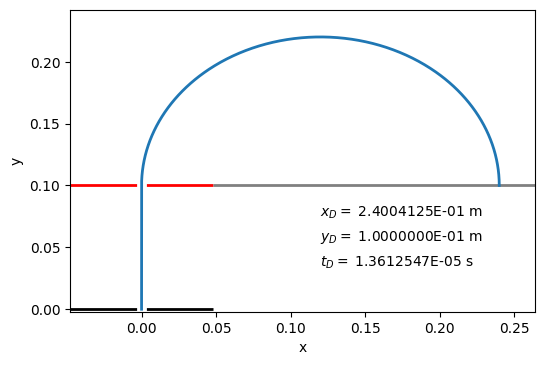

In [ ]:
### Grafica ###################
max_x=np.nanmax(x)
max_y=np.nanmax(y)
print('Máximo de x= {:.7E} m; Máximo de y= {:.7E} m.'.format(max_x,max_y))
x_impact=max_x

################ Busca el punto de impacto en la pantalla #############
max_index=np.where(x==max_x)
t_impact=t[max_index[0][0]]
y_impact=y[max_index[0][0]]
print('Posición de impacto: x= {:.5E} m; y= {:.5E} m; t= {:.5E} s'.format(x_impact,y_impact,t_impact))

###### Plot Figura ################################
fig=plt.figure()
fig.set_dpi(100)
#fig.set_size_inches(7,6.5)
ax=plt.axes(xlim=(-max_x*0.2,max_x*1.1),ylim=(-0.02*h,max_y*1.1))
line, = ax.plot(x,y,'-', linewidth=2)

#patches.Rectangle(xy, width, height, angle=0.0, **kwargs)[source]
# Placa superior del condensador
condensador_up = patches.Rectangle((-max_x*0.2,h),max_x*0.4,0,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(condensador_up)
# Placa inferior del condensador
condensador_down = patches.Rectangle((-max_x*0.2,0),max_x*0.4,0,linewidth=2,edgecolor='black',facecolor='none')
ax.add_patch(condensador_down)
# Pantalla de detección
pantalla = patches.Rectangle((max_x*0.2,h),max_x*1.1,0,linewidth=2,edgecolor='grey',facecolor='none')
ax.add_patch(pantalla)
# Zona-rectangulo de salida de los iones
salida = patches.Rectangle((-0.01*max_x,h*1.02),0.02*max_x,-h*1.05,linewidth=2,edgecolor='w',facecolor='w')
ax.add_patch(salida)

# Punto de impacto 
# pyplot.annotate(s, xy, *args, **kwargs)
#plt.annotate('$x_i=$ '+str(x_impact),(x_impact,h*1.3))
#plt.annotate('$t_i=$ '+str(t_impact),(x_impact,h*1.1))
#plt.annotate('$x$',(x_impact,h))
#plt.text(max_x,h,'o')

plt.text(max_x/2,h*0.75,'$x_D=$ {:.7E} m'.format(x_impact))
plt.text(max_x/2,h*0.55,'$y_D=$ {:.7E} m'.format(y_impact))
plt.text(max_x/2,h*0.35,'$t_D=$ {:.7E} s'.format(t_impact))
#ax.legend(loc='lower right')

# Etiquetas de los ejes x e y 
ax.set_ylabel("y")
ax.set_xlabel("x")
#
plt.show()


###Ejemplo de las 3 partículas al mismo tiempo###

Ion: 1H+; m= 1.66e-27 kg; q= 1.6e-19 C
x_imp= 1.385879E-01 m; t_imp=5.686802E-06
Ion: 2H+; m= 3.32e-27 kg; q= 1.6e-19 C
x_imp= 1.959929E-01 m; t_imp=9.777509E-06
Ion: 3H+; m= 4.98e-27 kg; q= 1.6e-19 C
x_imp= 2.400412E-01 m; t_imp=1.360520E-05


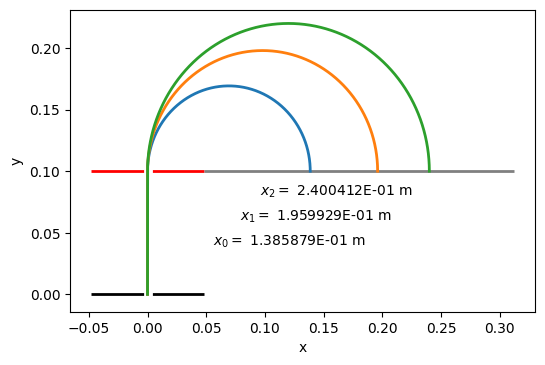

In [ ]:
#################  Ejemplo  #############################

#ion='2H+'
#m=iones[ion][0] # Masa del ion (Kg)
#q=iones[ion][1] # Carga del ion (C)

ion=['1H+','2H+','3H+']

#ion=['1H+']
n=np.size(ion)

#m=np.array([1.66E-27,3.32E-27,4.98E-27]) # masa de los iones (Kg)
#q=np.array([1.6E-19]) # carga de los iones (C)

###### Plot Figura ################################
###### Grafica ###################
fig=plt.figure()
fig.set_dpi(100)
ax=plt.axes()
#fig.set_size_inches(7,7)

#tf=1.5E-4  # tiempo de simulación considerado (s)
tf=1.2*t_impact 
nt=10000 # numero de pasos
z0=[0.0,0.0,0.000000001,0.0]   # Valores iniciales de las constantes
t=np.linspace(0,tf,nt)  #tiempo de simulación considerado
abserr = 1.0e-8
relerr = 1.0e-6

#listx=[]
#listy=[]
max_x=[]
max_y=[]
max_ind=[]
xm =np.zeros((n,nt)) 
ym =np.zeros((n,nt))

for io in range(n):
    xmax= np.zeros(n)
    ymax= np.zeros(n)
    max_index= np.zeros(n)

    mi=iones[ion[io]][0] # Masa del ion (Kg)
    q=iones[ion[io]][1] # Carga del ion (C)
    #print('Ion {} m= {} kg; q= {} C'.format(io,iones[io][0],iones[io][1] ))
    print('Ion: {}; m= {} kg; q= {} C'.format(ion[io],mi,q ))

    # Llamada a la subrutina odeint que resuelva las ecuaciones de movimiento
    # para el ion para el tiempo de 0 a tf
    x=np.zeros(nt)
    y=np.zeros(nt)

    qm=q/mi
    par=[qm,E,B,h]

    z=odeint(espectrometro,z0,t,args=(par,),atol=abserr,rtol=relerr)

    # Store solution for plotting
    x = z[:, 0]
    y = z[:, 2]
    
    xm[io,:] = x
    ym[io,:] = y
    
    xmax=np.nanmax(x)
    ymax=np.nanmax(y)
    max_index=np.where(x>=xmax)
    t_imp=t[max_index[0][0]]   
    
    max_x.append(xmax)
    max_y.append(ymax)
       
    line,=ax.plot(x,y,'-', linewidth=2)

    # Punto de impacto
    ximp=str('{:5E}'.format(xmax))
    plt.text(xmax/2.5,io*0.02+h*0.4,'$x_'+str(io)+'=$ '+ximp+' m')
    print('x_imp= '+str(ximp)+' m; t_imp='+str('{:3E}'.format(t_imp)))

axmax=np.max(max_x)
# axmay=np.max(max_y)
# print(axmax)
# print(axmay)

#patches.Rectangle(xy, width, height, angle=0.0, **kwargs)[source]
# Placa superior del condensador
condensador_up = patches.Rectangle((-axmax*0.2,h),axmax*0.4,0,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(condensador_up)
# Placa inferior del condensador
condensador_down = patches.Rectangle((-axmax*0.2,0),axmax*0.4,0,linewidth=2,edgecolor='black',facecolor='none')
ax.add_patch(condensador_down)
# Pantalla de detección
pantalla = patches.Rectangle((axmax*0.2,h),axmax*1.1,0,linewidth=2,edgecolor='grey',facecolor='none')
ax.add_patch(pantalla)
# Zona-rectangulo de salida de los iones
salida = patches.Rectangle((-0.002,h*1.02),0.02*axmax,-h*1.05,linewidth=2,edgecolor='w',facecolor='w')
ax.add_patch(salida)

#ax.legend(loc='lower right')

# Etiquetas de los ejes x e y 
ax.set_ylabel("y")
ax.set_xlabel("x")
plt.show()

